#### Goal : Predict rain sum (mm)

Deskripsi fitur __train.csv__:

`time` – Tanggal pencatatan

`temperature_2m_max (°C)` – Temperatur udara tertinggi pada ketinggian 2 m di atas permukaan

`temperature_2m_min (°C)` – Temperatur udara terendah pada ketinggian 2 m di atas permukaan

`apparent_temperature_max (°C)` – Temperatur semu maksimum yang terasa

`apparent_temperature_min (°C)` – Temperatur semu minimum yang terasa

`sunrise (iso8601)` – Waktu matahari terbit pada hari itu dengan format ISO 8601

`sunset (iso8601)` – Waktu matahari tenggelam pada hari itu dengan format ISO 8601

`shortwave_radiation_sum (MJ/m²)` – Total radiasi matahari pada hari tersebut

`rain_sum (mm)` – Jumlah curah hujan pada hari tersebut

`snowfall_sum (cm)` – Jumlah hujan salju pada hari tersebut

`windspeed_10m_max (km/h)` – Kecepatan angin maksimum pada ketinggian 10 m

`windgusts_10m_max (km/h) `- Kecepatan angin minimum pada ketinggian 10 m

`winddirection_10m_dominant (°)` – Arah angin dominan pada hari tersebut

`et0_fao_evapotranspiration (mm)` – Jumlah evaporasi dan transpirasi pada hari tersebut`

`elevation` – Ketinggian kota yang tercatat

`city` – Nama kota yang tercatat

# Library

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [74]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

ModuleNotFoundError: No module named 'lightgbm'

# 1) Exploration and Cleaning

In [75]:
train_data = pd.read_csv('train.csv')
train_h_data = pd.read_csv('train_hourly.csv')
test_data = pd.read_csv('test.csv')
test_h_data = pd.read_csv('test_hourly.csv')

In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13258 entries, 0 to 13257
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   time                             13258 non-null  object 
 1   temperature_2m_max (°C)          13208 non-null  float64
 2   temperature_2m_min (°C)          13208 non-null  float64
 3   apparent_temperature_max (°C)    13208 non-null  float64
 4   apparent_temperature_min (°C)    13208 non-null  float64
 5   sunrise (iso8601)                13258 non-null  object 
 6   sunset (iso8601)                 13258 non-null  object 
 7   shortwave_radiation_sum (MJ/m²)  13198 non-null  float64
 8   rain_sum (mm)                    13198 non-null  float64
 9   snowfall_sum (cm)                13198 non-null  float64
 10  windspeed_10m_max (km/h)         13208 non-null  float64
 11  windgusts_10m_max (km/h)         13208 non-null  float64
 12  winddirection_10m_

In [77]:
train_h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318192 entries, 0 to 318191
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   time                                318192 non-null  object 
 1   temperature_2m (°C)                 318022 non-null  float64
 2   relativehumidity_2m (%)             318022 non-null  float64
 3   dewpoint_2m (°C)                    318022 non-null  float64
 4   apparent_temperature (°C)           318022 non-null  float64
 5   pressure_msl (hPa)                  318022 non-null  float64
 6   surface_pressure (hPa)              318022 non-null  float64
 7   snowfall (cm)                       318022 non-null  float64
 8   cloudcover (%)                      318022 non-null  float64
 9   cloudcover_low (%)                  318022 non-null  float64
 10  cloudcover_mid (%)                  318022 non-null  float64
 11  cloudcover_high (%)       

In [78]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4972 entries, 0 to 4971
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               4972 non-null   int64  
 1   time                             4972 non-null   object 
 2   temperature_2m_max (°C)          4972 non-null   float64
 3   temperature_2m_min (°C)          4972 non-null   float64
 4   apparent_temperature_max (°C)    4972 non-null   float64
 5   apparent_temperature_min (°C)    4972 non-null   float64
 6   sunrise (iso8601)                4972 non-null   object 
 7   sunset (iso8601)                 4972 non-null   object 
 8   shortwave_radiation_sum (MJ/m²)  4972 non-null   float64
 9   snowfall_sum (cm)                4972 non-null   float64
 10  windspeed_10m_max (km/h)         4972 non-null   float64
 11  windgusts_10m_max (km/h)         4972 non-null   float64
 12  winddirection_10m_do

- Dataframe test tidak memiliki `null values`

In [6]:
test_h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119328 entries, 0 to 119327
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   time                                119328 non-null  object 
 1   temperature_2m (°C)                 119328 non-null  float64
 2   relativehumidity_2m (%)             119328 non-null  float64
 3   dewpoint_2m (°C)                    119328 non-null  float64
 4   apparent_temperature (°C)           119328 non-null  float64
 5   pressure_msl (hPa)                  119328 non-null  float64
 6   surface_pressure (hPa)              119328 non-null  float64
 7   snowfall (cm)                       119328 non-null  float64
 8   cloudcover (%)                      119328 non-null  float64
 9   cloudcover_low (%)                  119328 non-null  float64
 10  cloudcover_mid (%)                  119328 non-null  float64
 11  cloudcover_high (%)       

hanya data hourly mengenai winddirection_100m yang memiliki Null

In [80]:
test_h_data.isnull().sum().sort_values(ascending=False)

winddirection_100m (°)                56
time                                   0
temperature_2m (°C)                    0
soil_moisture_100_to_255cm (m³/m³)     0
soil_moisture_28_to_100cm (m³/m³)      0
soil_moisture_7_to_28cm (m³/m³)        0
soil_moisture_0_to_7cm (m³/m³)         0
soil_temperature_100_to_255cm (°C)     0
soil_temperature_28_to_100cm (°C)      0
soil_temperature_7_to_28cm (°C)        0
soil_temperature_0_to_7cm (°C)         0
vapor_pressure_deficit (kPa)           0
et0_fao_evapotranspiration (mm)        0
windgusts_10m (km/h)                   0
winddirection_10m (°)                  0
windspeed_100m (km/h)                  0
windspeed_10m (km/h)                   0
direct_normal_irradiance (W/m²)        0
diffuse_radiation (W/m²)               0
direct_radiation (W/m²)                0
shortwave_radiation (W/m²)             0
cloudcover_high (%)                    0
cloudcover_mid (%)                     0
cloudcover_low (%)                     0
cloudcover (%)  

- Pada dataframe test hourly hanya `winddirection_100m` yang memiliki `null values`

In [70]:
train_data

,time,temperature_2m_max (°C),temperature_2m_min (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),sunrise (iso8601),sunset (iso8601),shortwave_radiation_sum (MJ/m²),rain_sum (mm),snowfall_sum (cm),windspeed_10m_max (km/h),windgusts_10m_max (km/h),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city
0,2018-01-01,29.9,26.0,36.3,31.6,2018-01-01T05:15,2018-01-01T17:49,17.59,7.7,0.0,6.9,20.2,277.0,3.61,0,su
1,2018-01-02,30.6,25.7,37.7,31.2,2018-01-02T05:15,2018-01-02T17:50,19.87,9.4,0.0,7.1,18.0,168.0,4.11,0,su
2,2018-01-03,31.8,25.9,40.3,31.7,2018-01-03T05:16,2018-01-03T17:50,20.44,7.8,0.0,8.1,21.2,125.0,4.23,0,su
3,2018-01-04,30.8,26.0,39.1,31.6,2018-01-04T05:16,2018-01-04T17:50,20.44,29.7,0.0,7.2,21.6,190.0,4.22,0,su
4,2018-01-05,30.9,25.2,37.6,29.9,2018-01-05T05:17,2018-01-05T17:51,20.10,22.5,0.0,6.9,21.2,241.0,4.16,0,su
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13253,2022-12-24,NaN,NaN,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,q
13254,2022-12-25,NaN,NaN,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,q
13255,2022-12-26,NaN,NaN,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,q
13256,2022-12-27,NaN,NaN,NaN,NaN,1970-01-01T07:00,1970-01-01T07:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,q


# Data Cleansing

<AxesSubplot:>

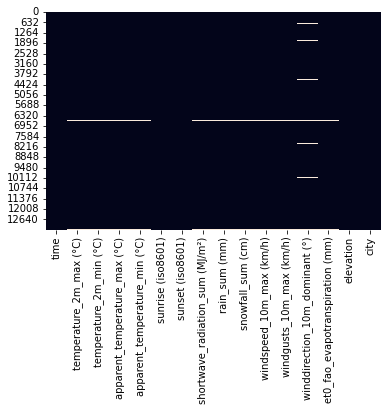

In [7]:
sns.heatmap(train_data.isnull(), cbar=False)

<AxesSubplot:>

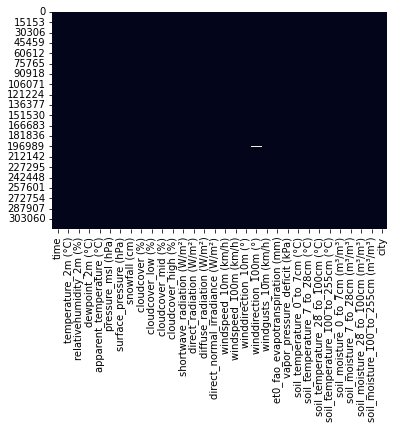

In [8]:
sns.heatmap(train_h_data.isnull(), cbar=False)

In [19]:
train_data = pd.read_csv('train.csv')
train_h_data = pd.read_csv('train_hourly.csv')
test_data = pd.read_csv('test.csv')
test_h_data = pd.read_csv('test_hourly.csv')

train_h_grouped_data = train_h_data.copy()

train_h_grouped_data["time"] = pd.to_datetime(train_h_grouped_data["time"]).dt.date
train_h_grouped_data["time"] = train_h_grouped_data["time"].apply(str) 

In [42]:
used_col = train_h_grouped_data.columns[1:len(train_h_grouped_data.columns)-1]

In [43]:
train_h_grouped_data[used_col] = train_h_grouped_data.groupby(['city', 'time'])[used_col].transform(lambda x: x.fillna(x.mean()))

In [46]:
train_h_grouped_data.to_csv('train_hourly_no_null.csv', index=False)

<AxesSubplot:>

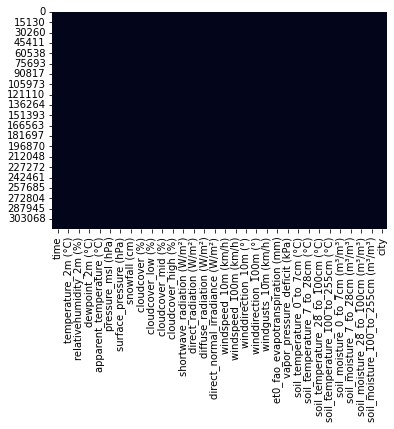

In [44]:
sns.heatmap(train_h_grouped_data.isnull(), cbar=False)

In [ ]:
train_h_grouped_data = pd.read_csv('train_hourly_no_null.csv')

In [ ]:
train_h_avg_data = train_h_grouped_data.groupby(['time', 'city']).mean().reset_index().copy()
train_h_max_data = train_h_grouped_data.groupby(['time', 'city']).max().reset_index().copy()
train_h_min_data = train_h_grouped_data.groupby(['time', 'city']).min().reset_index().copy()
train_h_sum_data = train_h_grouped_data.groupby(['time', 'city']).sum().reset_index().copy()
# train_h_wind_mode_data = train_h_grouped_data.groupby(['time', 'city'])['winddirection_10m (°)'].agg(lambda x: pd.Series.mode(x)[0]).reset_index().rename(columns={'winddirection_10m (°)': 'winddirection_10m_dominant (°)'})

train_h_max_data = train_h_max_data.add_prefix('max_').rename(columns={'max_city': 'city', 'max_time': 'time'})
train_h_min_data = train_h_min_data.add_prefix('min_').rename(columns={'min_city': 'city', 'min_time': 'time'})
train_h_avg_data = train_h_avg_data.add_prefix('avg_').rename(columns={'avg_city': 'city', 'avg_time': 'time'})
train_h_sum_data = train_h_sum_data.add_prefix('sum_').rename(columns={'sum_city': 'city', 'sum_time': 'time'})

In [82]:
cleaned_train = train_data.merge(train_h_max_data, on=['city', 'time'])
cleaned_train = cleaned_train.merge(train_h_min_data, on=['city', 'time'])
cleaned_train = cleaned_train.merge(train_h_avg_data, on=['city', 'time'])
cleaned_train = cleaned_train.merge(train_h_sum_data, on=['city', 'time'])
# cleaned_train = cleaned_train.merge(train_h_wind_mode_data, on=['city', 'time'])

cleaned_train = cleaned_train.drop([
    'temperature_2m_max (°C)',
    'temperature_2m_min (°C)',
    'apparent_temperature_max (°C)',
    'apparent_temperature_min (°C)',
    'snowfall_sum (cm)',
    'windspeed_10m_max (km/h)',
    'windgusts_10m_max (km/h)',
    'shortwave_radiation_sum (MJ/m²)',
], axis = 1).rename(columns={'winddirection_10m_dominant (°)_y': 'winddirection_10m_dominant (°)'}).dropna(subset=['rain_sum (mm)'])

In [83]:
test_h_grouped_data = test_h_data.copy()

test_h_grouped_data["time"] = pd.to_datetime(test_h_grouped_data["time"]).dt.date
test_h_grouped_data["time"] = test_h_grouped_data["time"].apply(str) 

test_h_avg_data = test_h_grouped_data.groupby(['time', 'city']).mean().reset_index().copy()
test_h_max_data = test_h_grouped_data.groupby(['time', 'city']).max().reset_index().copy()
test_h_min_data = test_h_grouped_data.groupby(['time', 'city']).min().reset_index().copy()
test_h_sum_data = test_h_grouped_data.groupby(['time', 'city']).sum().reset_index().copy()
# train_h_wind_mode_data = train_h_grouped_data.groupby(['time', 'city'])['winddirection_10m (°)'].agg(lambda x: pd.Series.mode(x)[0]).reset_index().rename(columns={'winddirection_10m (°)': 'winddirection_10m_dominant (°)'})

test_h_max_data = test_h_max_data.add_prefix('max_').rename(columns={'max_city': 'city', 'max_time': 'time'})
test_h_min_data = test_h_min_data.add_prefix('min_').rename(columns={'min_city': 'city', 'min_time': 'time'})
test_h_avg_data = test_h_avg_data.add_prefix('avg_').rename(columns={'avg_city': 'city', 'avg_time': 'time'})
test_h_sum_data = test_h_sum_data.add_prefix('sum_').rename(columns={'sum_city': 'city', 'sum_time': 'time'})

In [85]:
cleaned_test = test_data.merge(test_h_max_data, on=['city', 'time'])
cleaned_test = cleaned_test.merge(test_h_min_data, on=['city', 'time'])
cleaned_test = cleaned_test.merge(test_h_avg_data, on=['city', 'time'])
cleaned_test = cleaned_test.merge(test_h_sum_data, on=['city', 'time'])
# cleaned_train = cleaned_train.merge(train_h_wind_mode_data, on=['city', 'time'])

cleaned_test = cleaned_test.drop([
    'temperature_2m_max (°C)',
    'temperature_2m_min (°C)',
    'apparent_temperature_max (°C)',
    'apparent_temperature_min (°C)',
    'snowfall_sum (cm)',
    'windspeed_10m_max (km/h)',
    'windgusts_10m_max (km/h)',
    'shortwave_radiation_sum (MJ/m²)',
], axis = 1).rename(columns={'winddirection_10m_dominant (°)_y': 'winddirection_10m_dominant (°)'})

Note: 

Semua suffix \_max, \_min, dan \_sum diubah menjadi prefix max_, min_, dan sum_ 

Contoh : 

temperature_2m_max (°C) -> max_temperature_2m (°C)


In [ ]:
[i for i in cleaned_train.columns]

['time',
 'sunrise (iso8601)',
 'sunset (iso8601)',
 'rain_sum (mm)',
 'winddirection_10m_dominant (°)',
 'et0_fao_evapotranspiration (mm)',
 'elevation',
 'city',
 'max_temperature_2m (°C)',
 'max_relativehumidity_2m (%)',
 'max_dewpoint_2m (°C)',
 'max_apparent_temperature (°C)',
 'max_pressure_msl (hPa)',
 'max_surface_pressure (hPa)',
 'max_snowfall (cm)',
 'max_cloudcover (%)',
 'max_cloudcover_low (%)',
 'max_cloudcover_mid (%)',
 'max_cloudcover_high (%)',
 'max_shortwave_radiation (W/m²)',
 'max_direct_radiation (W/m²)',
 'max_diffuse_radiation (W/m²)',
 'max_direct_normal_irradiance (W/m²)',
 'max_windspeed_10m (km/h)',
 'max_windspeed_100m (km/h)',
 'max_winddirection_10m (°)',
 'max_winddirection_100m (°)',
 'max_windgusts_10m (km/h)',
 'max_et0_fao_evapotranspiration (mm)',
 'max_vapor_pressure_deficit (kPa)',
 'max_soil_temperature_0_to_7cm (°C)',
 'max_soil_temperature_7_to_28cm (°C)',
 'max_soil_temperature_28_to_100cm (°C)',
 'max_soil_temperature_100_to_255cm (°C)',
 '

In [ ]:
cleaned_train

,time,sunrise (iso8601),sunset (iso8601),rain_sum (mm),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city,max_temperature_2m (°C),max_relativehumidity_2m (%),...,sum_et0_fao_evapotranspiration (mm),sum_vapor_pressure_deficit (kPa),sum_soil_temperature_0_to_7cm (°C),sum_soil_temperature_7_to_28cm (°C),sum_soil_temperature_28_to_100cm (°C),sum_soil_temperature_100_to_255cm (°C),sum_soil_moisture_0_to_7cm (m³/m³),sum_soil_moisture_7_to_28cm (m³/m³),sum_soil_moisture_28_to_100cm (m³/m³),sum_soil_moisture_100_to_255cm (m³/m³)
0,2018-01-01,2018-01-01T05:15,2018-01-01T17:49,7.7,277.0,3.61,0,su,29.0,94.0,...,3.61,11.10,684.7,686.2,688.8,702.5,7.150,7.207,6.784,6.720
1,2018-01-02,2018-01-02T05:15,2018-01-02T17:50,9.4,168.0,4.11,0,su,29.5,94.0,...,4.11,12.35,689.0,687.3,688.9,700.8,7.577,7.494,6.891,6.720
2,2018-01-03,2018-01-03T05:16,2018-01-03T17:50,7.8,125.0,4.23,0,su,30.4,95.0,...,4.23,14.51,694.9,692.0,689.7,700.8,7.174,7.314,7.003,6.732
3,2018-01-04,2018-01-04T05:16,2018-01-04T17:50,29.7,190.0,4.22,0,su,30.0,96.0,...,4.22,11.62,698.2,695.4,691.5,700.8,7.726,7.623,7.082,6.745
4,2018-01-05,2018-01-05T05:17,2018-01-05T17:51,22.5,241.0,4.16,0,su,29.9,96.0,...,4.16,13.00,693.5,693.8,692.6,700.8,7.811,8.088,7.545,6.787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13247,2021-07-30,1970-01-01T07:00,1970-01-01T07:00,2.8,54.0,1.26,0,q,9.4,76.0,...,1.26,7.10,199.3,183.3,88.6,-74.8,3.721,4.872,5.928,6.072
13248,2021-07-31,1970-01-01T07:00,1970-01-01T07:00,2.1,352.0,1.20,0,q,8.7,81.0,...,1.20,5.49,212.6,177.2,88.8,-70.7,4.095,4.872,5.928,6.072
13249,2021-08-01,1970-01-01T07:00,1970-01-01T07:00,0.0,335.0,1.49,0,q,7.1,81.0,...,1.49,4.74,239.2,192.9,90.8,-66.7,3.740,4.851,5.928,6.072
13250,2021-08-02,1970-01-01T07:00,1970-01-01T07:00,0.0,NaN,1.71,0,q,9.1,88.0,...,1.71,4.87,241.4,203.1,94.9,-63.0,3.227,4.848,5.928,6.072


In [ ]:
cleaned_train.isnull().sum()

time                                        0
sunrise (iso8601)                           0
sunset (iso8601)                            0
rain_sum (mm)                               0
winddirection_10m_dominant (°)            406
                                         ... 
sum_soil_temperature_100_to_255cm (°C)      0
sum_soil_moisture_0_to_7cm (m³/m³)          0
sum_soil_moisture_7_to_28cm (m³/m³)         0
sum_soil_moisture_28_to_100cm (m³/m³)       0
sum_soil_moisture_100_to_255cm (m³/m³)      0
Length: 128, dtype: int64

# Exploratory Data Analysis

In [86]:
train_drop = train_data.drop([
    'temperature_2m_max (°C)',
    'temperature_2m_min (°C)',
    'apparent_temperature_max (°C)',
    'apparent_temperature_min (°C)',
    'snowfall_sum (cm)',
    'windspeed_10m_max (km/h)',
    'windgusts_10m_max (km/h)',
    'shortwave_radiation_sum (MJ/m²)',
], axis = 1).rename(columns={'winddirection_10m_dominant (°)_y': 'winddirection_10m_dominant (°)'}).dropna(subset=['rain_sum (mm)'])

cleaned_train_max = train_drop.merge(train_h_max_data, on=['city', 'time'])
cleaned_train_min = train_drop.merge(train_h_min_data, on=['city', 'time'])
cleaned_train_avg = train_drop.merge(train_h_avg_data, on=['city', 'time'])
cleaned_train_sum = train_drop.merge(train_h_sum_data, on=['city', 'time'])

### Study of Relationship Between Variables

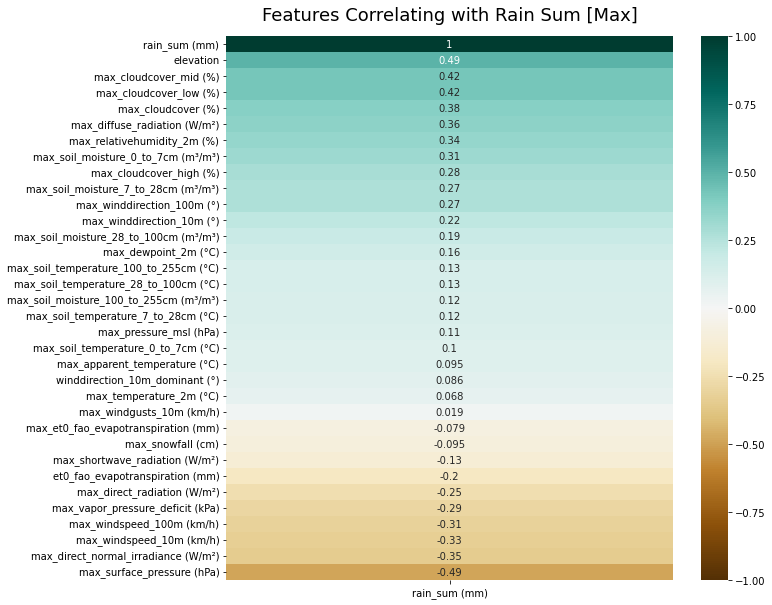

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 

heatmap = sns.heatmap(cleaned_train_max.corr()[['rain_sum (mm)']].sort_values(by='rain_sum (mm)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax)
heatmap.set_title('Features Correlating with Rain Sum [Max]', fontdict={'fontsize':18}, pad=16);

Potential feature: "elevation", "max_cloudcover_mid", "max_cloudcover_low", "max_surface_pressure"

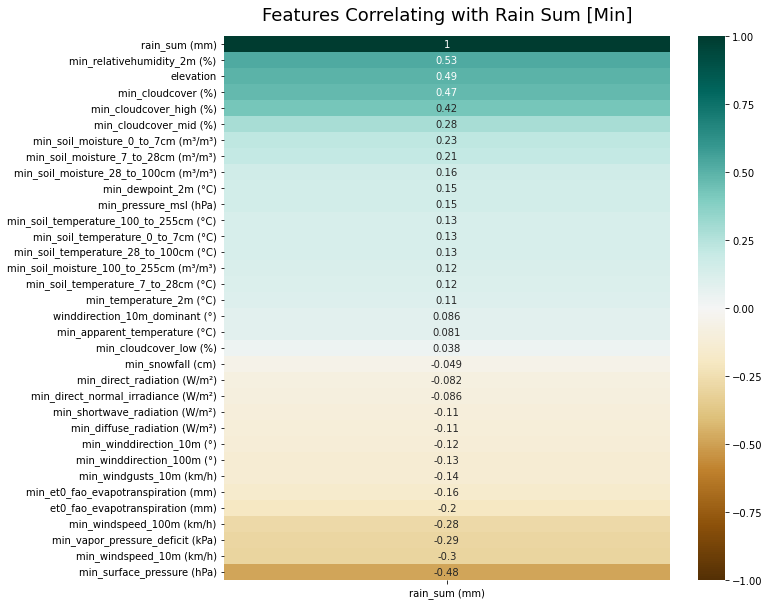

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 

heatmap = sns.heatmap(cleaned_train_min.corr()[['rain_sum (mm)']].sort_values(by='rain_sum (mm)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax)
heatmap.set_title('Features Correlating with Rain Sum [Min]', fontdict={'fontsize':18}, pad=16);

Potential feature: "min_relativehumidity_2m", "min_cloudcover", "min_cloudcover_high", "min_surface_pressure"

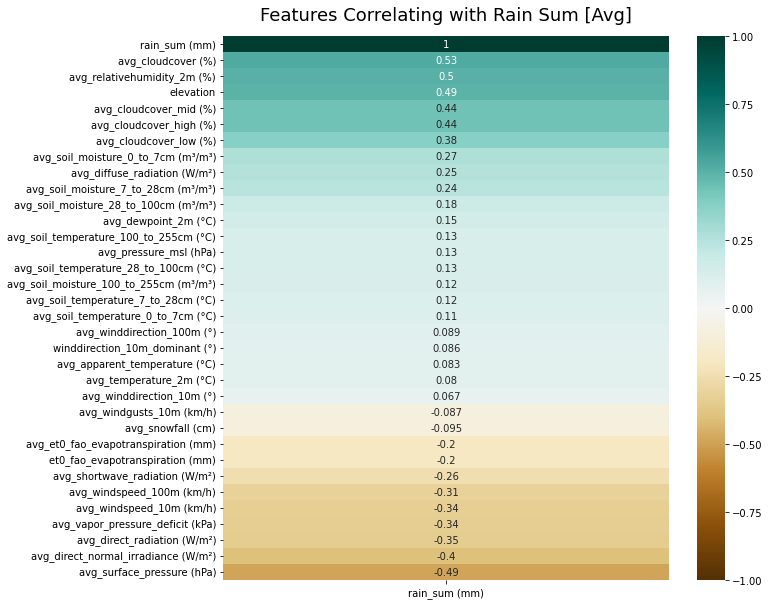

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 

heatmap = sns.heatmap(cleaned_train_avg.corr()[['rain_sum (mm)']].sort_values(by='rain_sum (mm)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax)
heatmap.set_title('Features Correlating with Rain Sum [Avg]', fontdict={'fontsize':18}, pad=16);

Potential feature: "avg_cloudcover", "avg_relative_humidity_2m", "avg_cloudcover_mid", "avg_cloudcover_high", "avg_direct_normal_irradiance", "avg_surface_pressure"

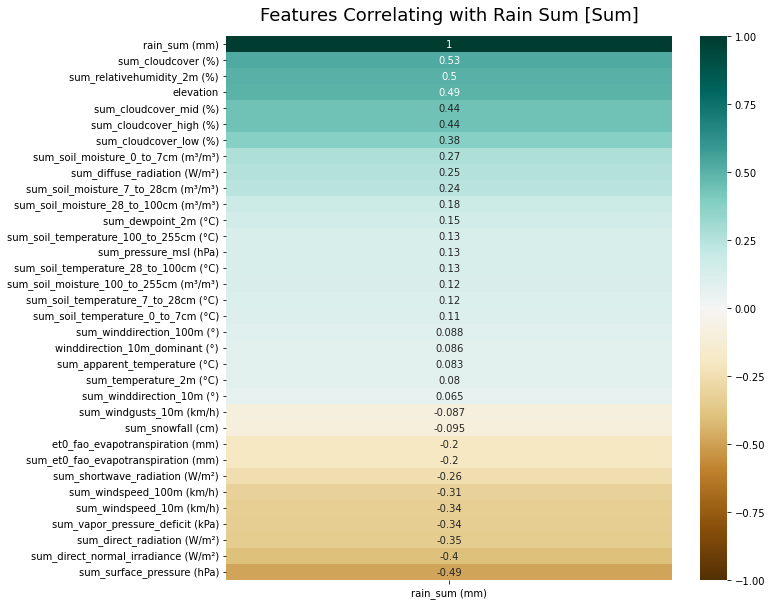

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 

heatmap = sns.heatmap(cleaned_train_sum.corr()[['rain_sum (mm)']].sort_values(by='rain_sum (mm)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG', ax=ax)
heatmap.set_title('Features Correlating with Rain Sum [Sum]', fontdict={'fontsize':18}, pad=16);

Potential feature: "sum_cloudcover", "sum_relative_humidity_2m", "sum_cloudcover_mid", "sum_cloudcover_high", "sum_direct_normal_irradiance", "sum_surface_pressure"

### Further check

In [ ]:
features = ["rain_sum (mm)","elevation", "max_cloudcover_mid (%)", "max_cloudcover_low (%)", "max_surface_pressure (hPa)", 
"min_relativehumidity_2m (%)", "min_cloudcover (%)", "min_cloudcover_high (%)", "min_surface_pressure (hPa)", "avg_cloudcover (%)", "avg_relativehumidity_2m (%)",
"avg_cloudcover_mid (%)", "avg_cloudcover_high (%)", "avg_direct_normal_irradiance (W/m²)", "avg_surface_pressure (hPa)",
"sum_cloudcover (%)", "sum_relativehumidity_2m (%)", "sum_cloudcover_mid (%)", "sum_cloudcover_high (%)", "sum_direct_normal_irradiance (W/m²)", "sum_surface_pressure (hPa)"]

cleaned_train_features = cleaned_train[features]

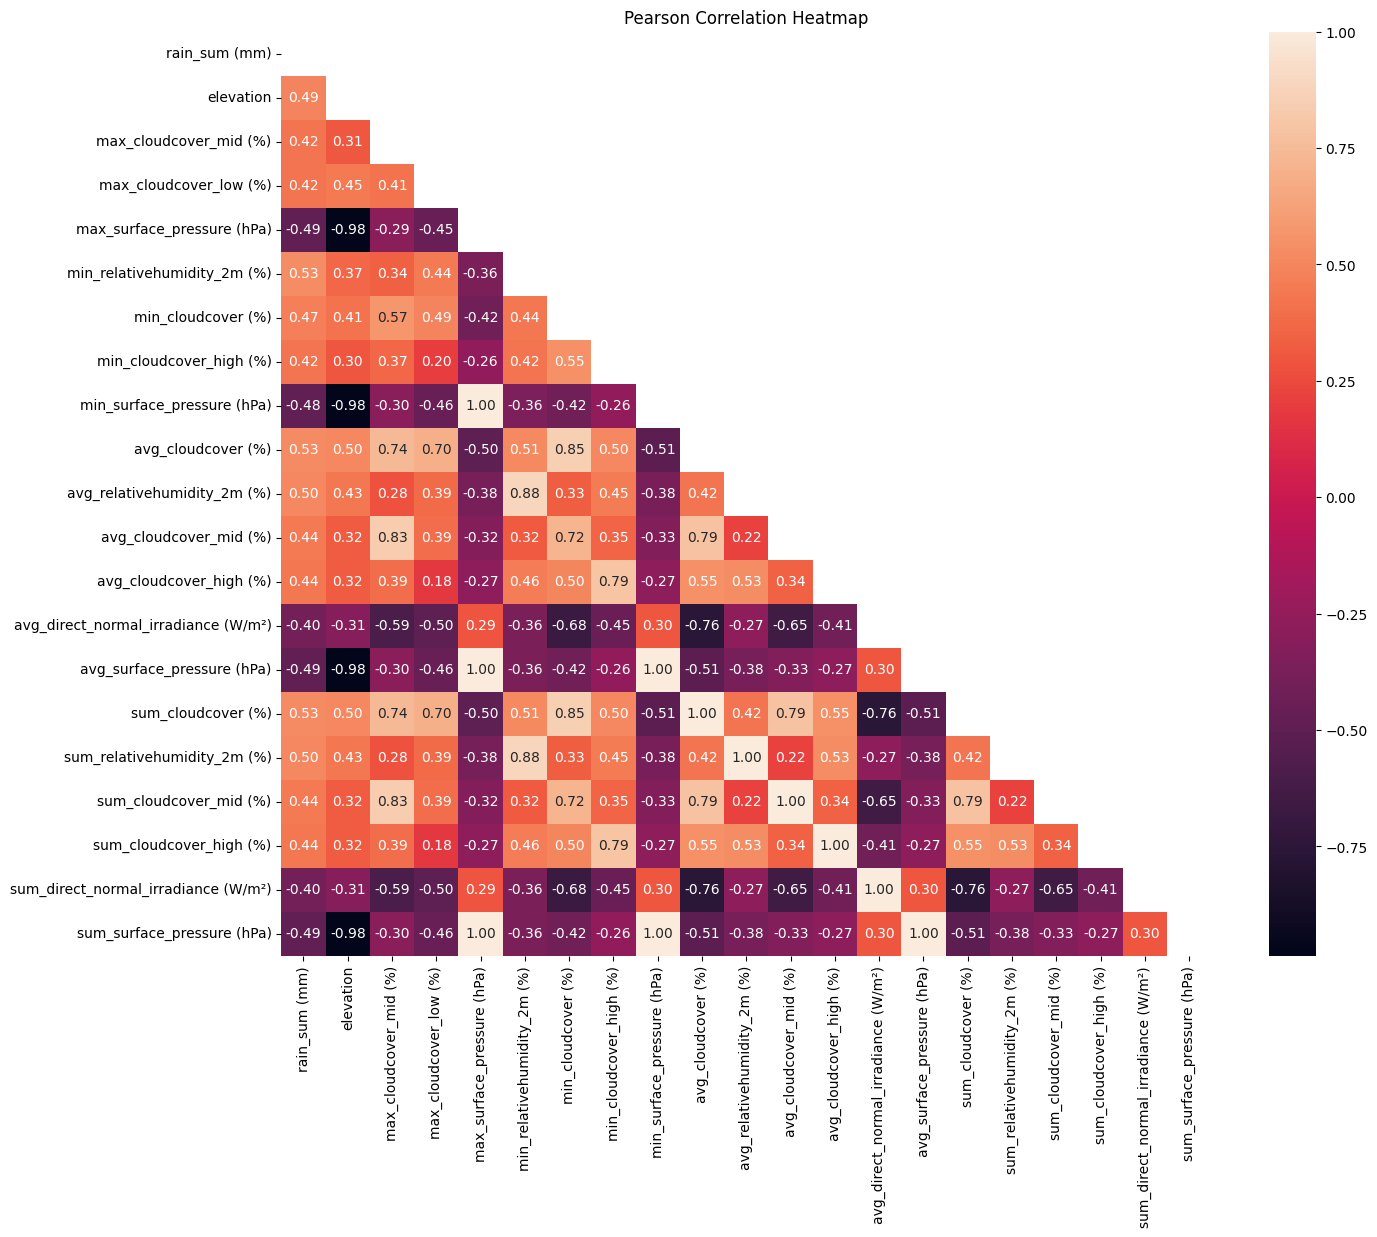

In [ ]:
cleaned_train_features_corr = cleaned_train_features.corr()
mask = np.zeros_like(cleaned_train_features_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(15, 12))
ax = sns.heatmap(cleaned_train_features_corr,mask=mask, annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

/var/folders/tc/rbnfvcts4zs91x8c631dqs5w0000gp/T/ipykernel_4769/3309863344.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


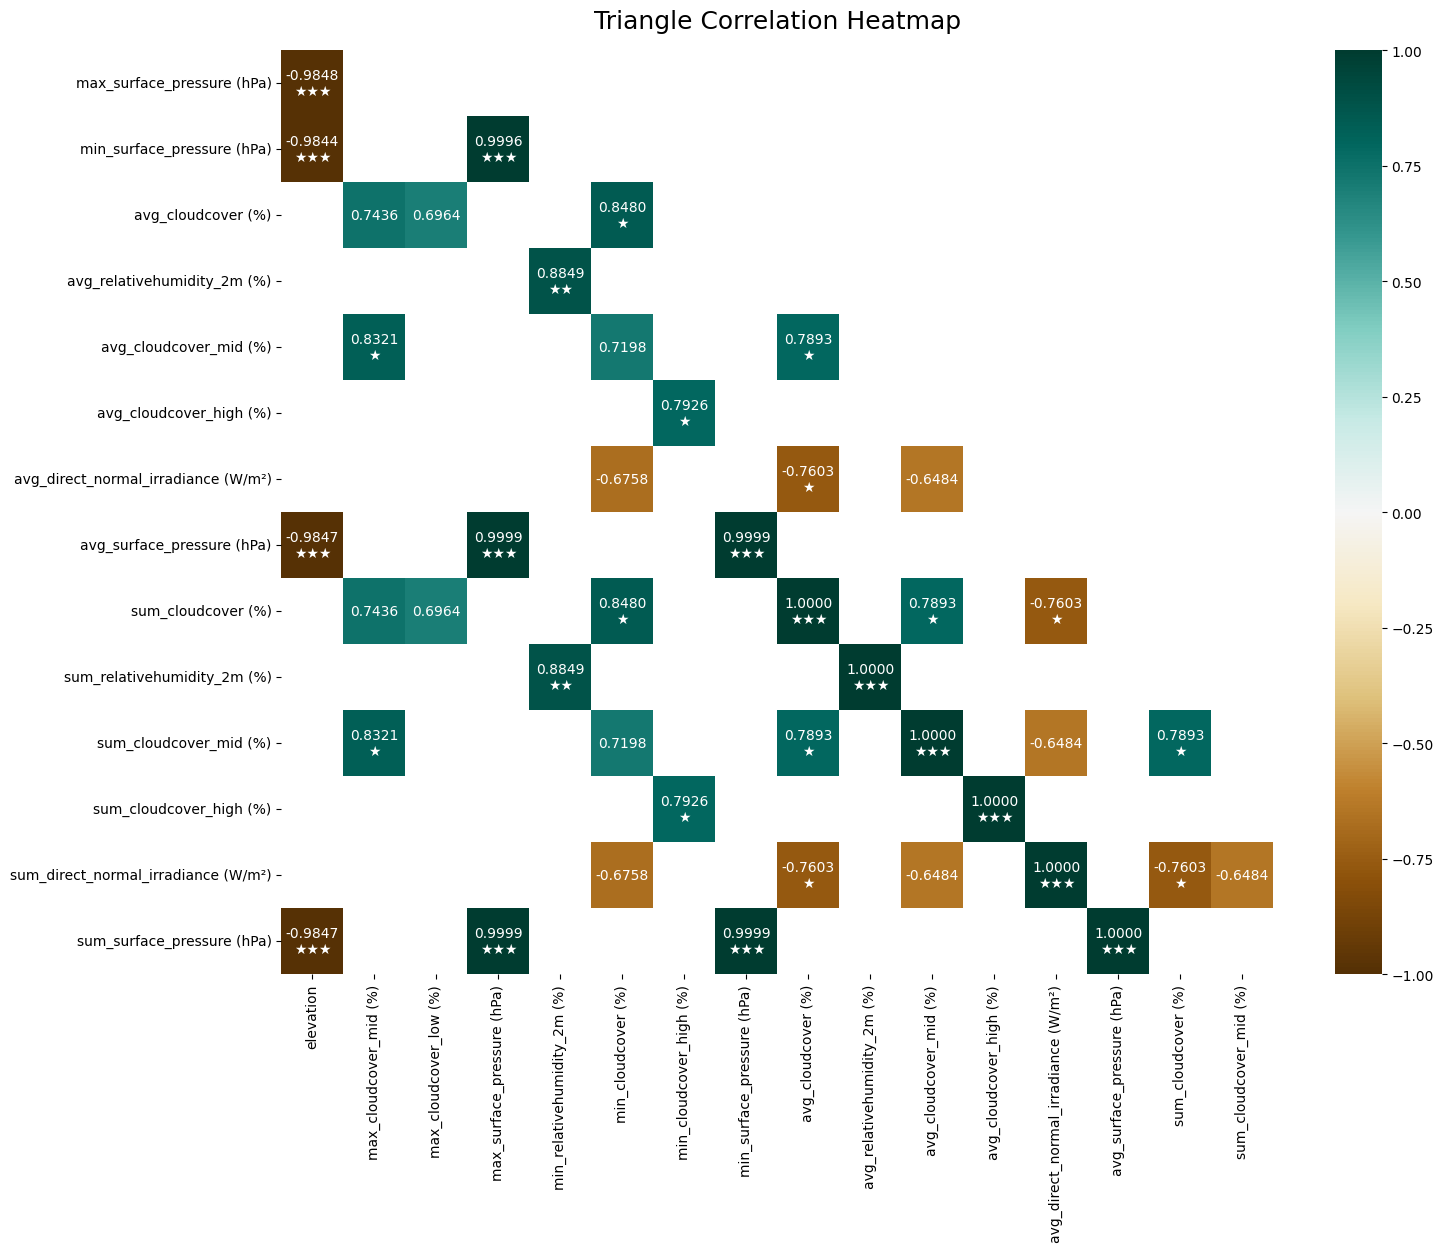

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 12))
corr = cleaned_train_features.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.6  # only show cells with abs(correlation) at least this value
extreme_1 = 0.75  # show with a star
extreme_2 = 0.85  # show with a second star
extreme_3 = 0.90  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 18}, pad=16)
plt.show()

Selected features: "elevation", "avg_cloudcover (%)", "min_relativehumidity_2m (%)"

In [ ]:
columns = ["time", "city", "rain_sum (mm)", "elevation", "avg_cloudcover (%)", "min_relativehumidity_2m (%)"]

final_train = cleaned_train[columns]

No Seasonality

In [ ]:
import plotly.graph_objects as go

In [ ]:
df_su = final_train[final_train['city'] == 'su']
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_su.time
                         ,y=df_su['rain_sum (mm)']
                         ,name='Rain Sum observation for SU City'
                         ,line_color='deepskyblue'
                         )
             )
fig.update_layout(title_text='Interactive - Rain Sum Observation for SU City'
                  ,xaxis_range=[df_su.time.min(),df_su.time.max()]
                  ,xaxis_rangeslider_visible=True)
fig.show()

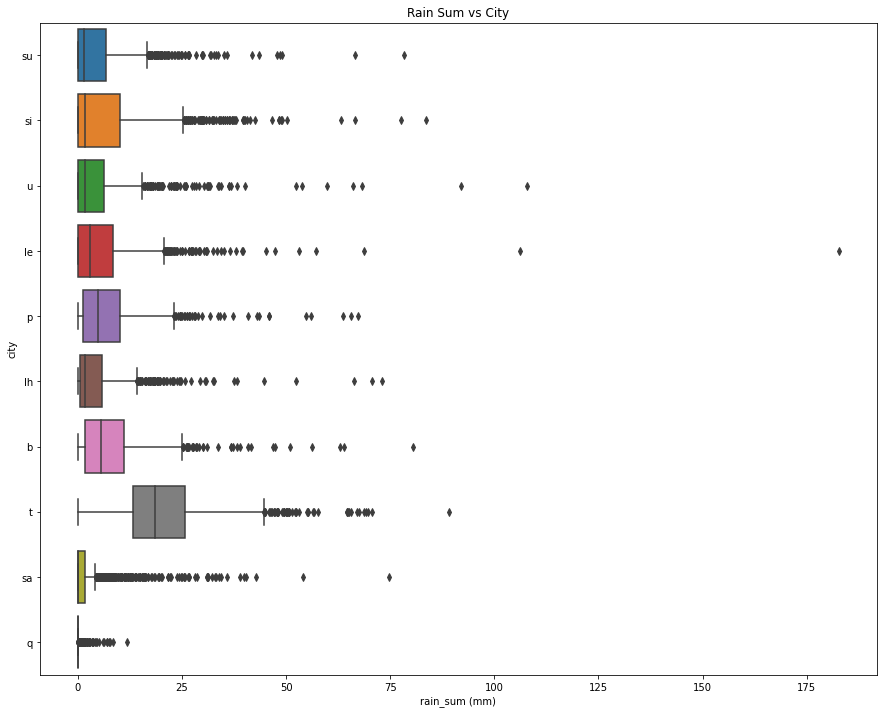

In [ ]:
plt.figure(figsize=(15,12))
sns.boxplot(x='rain_sum (mm)', y='city', data=final_train)
plt.title('Rain Sum vs City')
plt.show()

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(final_train, title="Pandas Profiling Report")
profile.to_widgets()

c:\Users\Jeremy\AppData\Local\Programs\Python\Python39\lib\site-packages\multimethod\__init__.py:315: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='avg_relativehumidity_2m (%)', ylabel='rain_sum (mm)'>

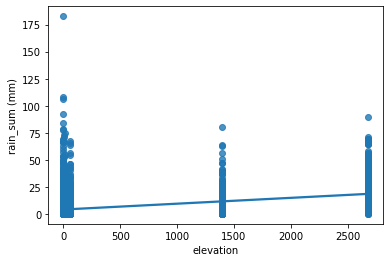

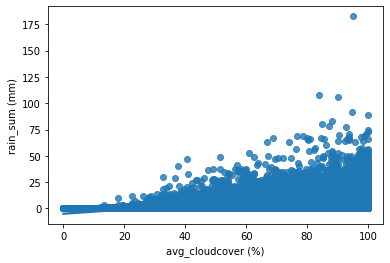

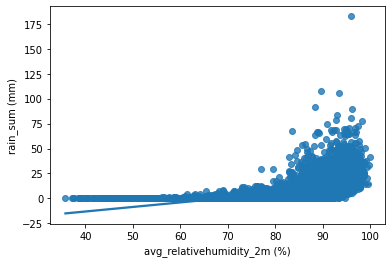

In [ ]:
# cleaned_train[['elevation', 'avg_cloudcover (%)', 'avg_relativehumidity_2m (%)', 'rain_sum (mm)']]
plt.figure()
sns.regplot(data=cleaned_train, x='elevation', y='rain_sum (mm)')
plt.figure()
sns.regplot(data=cleaned_train, x='avg_cloudcover (%)', y='rain_sum (mm)')
plt.figure()
sns.regplot(data=cleaned_train, x='avg_relativehumidity_2m (%)', y='rain_sum (mm)')

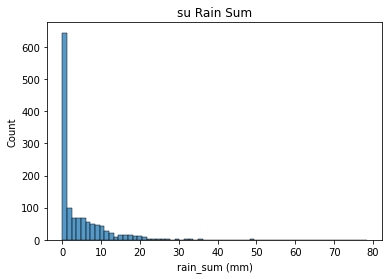

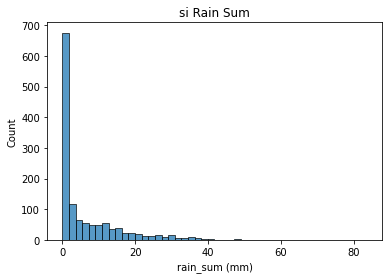

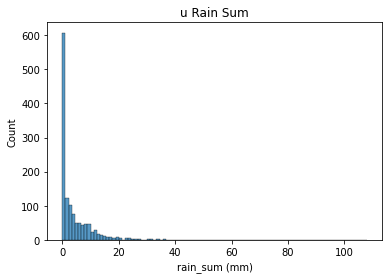

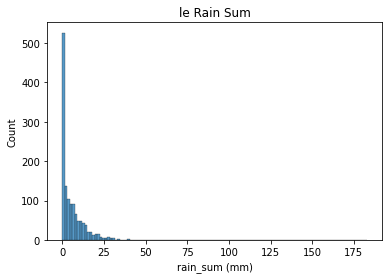

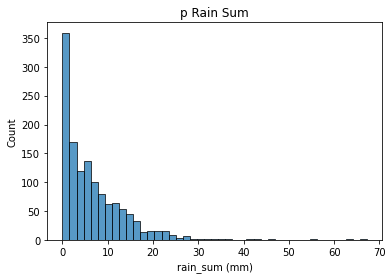

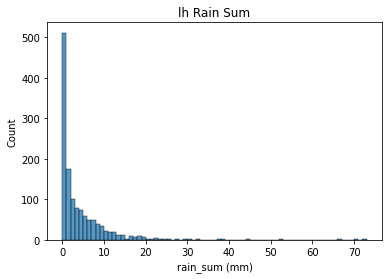

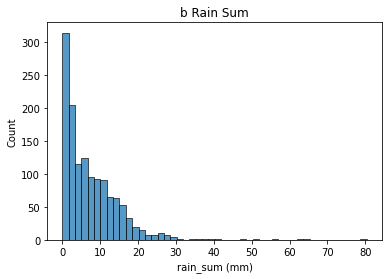

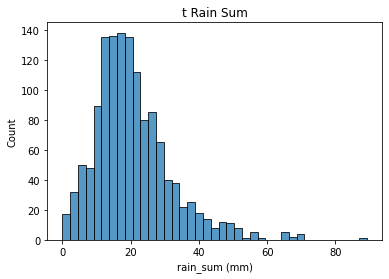

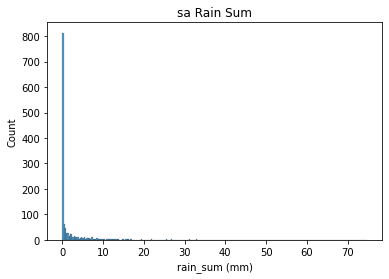

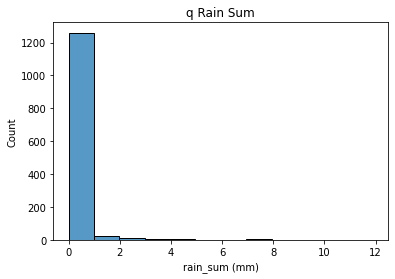

In [ ]:
for city in cleaned_train['city'].unique():
    plt.figure()
    sns.histplot(data=cleaned_train.loc[cleaned_train['city'] == city], x='rain_sum (mm)')
    plt.title(f'{city} Rain Sum')

# Modelling

### Random Forest

In [87]:
np.random.seed(42)

In [ ]:
features = ['elevation', 'avg_cloudcover (%)', 'avg_relativehumidity_2m (%)']
X = cleaned_train[features]
y = cleaned_train['rain_sum (mm)']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestRegressor(random_state=42))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [ ]:
y_pred = pipe.predict(X_val)
y_pred

array([ 8.748,  8.123, 11.262, ...,  7.682,  1.357,  2.478])

In [ ]:
mean_squared_error(y_pred, y_val)

47.47626350739566

# Modelling (Jer)

In [88]:
cleaned_train_all = cleaned_train.drop(['time','elevation', 'sunrise (iso8601)', 'sunset (iso8601)', 'winddirection_10m_dominant (°)'], axis=1)
cleaned_train_all = pd.get_dummies(cleaned_train_all, columns=['city'], drop_first=True)

def Definedata():
    X = cleaned_train_all.drop(columns=['rain_sum (mm)']).values
    y = cleaned_train_all['rain_sum (mm)'].values
    return X, y

In [89]:
def Models(models):
    
    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)
    
    print("\t\tError Table")
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10)) 
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Rain sum prediction of first {} days'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

In [90]:
Acc = pd.DataFrame(index=None, columns=['model','Mean Squared Error','Accuracy on Traing set','Accuracy on Testing set'])

In [91]:
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    
regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    MSE = metrics.mean_squared_error(y_test, y_pred)
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)
    
    Acc = Acc.append(pd.Series({'model':name, 'Mean Squared Error': MSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )

/var/folders/tc/rbnfvcts4zs91x8c631dqs5w0000gp/T/ipykernel_4769/2312663318.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Acc = Acc.append(pd.Series({'model':name, 'Mean Squared Error': MSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )
/var/folders/tc/rbnfvcts4zs91x8c631dqs5w0000gp/T/ipykernel_4769/2312663318.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Acc = Acc.append(pd.Series({'model':name, 'Mean Squared Error': MSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS}),ignore_index=True )
/var/folders/tc/rbnfvcts4zs91x8c631dqs5w0000gp/T/ipykernel_4769/2312663318.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Acc = Acc.append(pd.Series({'model':name, 'Mean

In [92]:
Acc.sort_values(by='Mean Squared Error')

,model,Mean Squared Error,Accuracy on Traing set,Accuracy on Testing set
1,XGBRegressor,21.220066,0.985523,0.756335
5,ExtraTreesRegressor,21.245830,1.000000,0.756039
2,RandomForestRegressor,22.725816,0.960820,0.739045
0,DecisionTreeRegressor,55.236469,1.000000,0.365732
4,AdaBoostRegressor,136.947877,-0.449658,-0.572542
3,MLPRegressor,237.389261,-1.606116,-1.725887


		Error Table
Mean Squared  Error      :  21.60075690688317
Accuracy on Traing set   :  0.9873200484270619
Accuracy on Testing set  :  0.7560569654773206


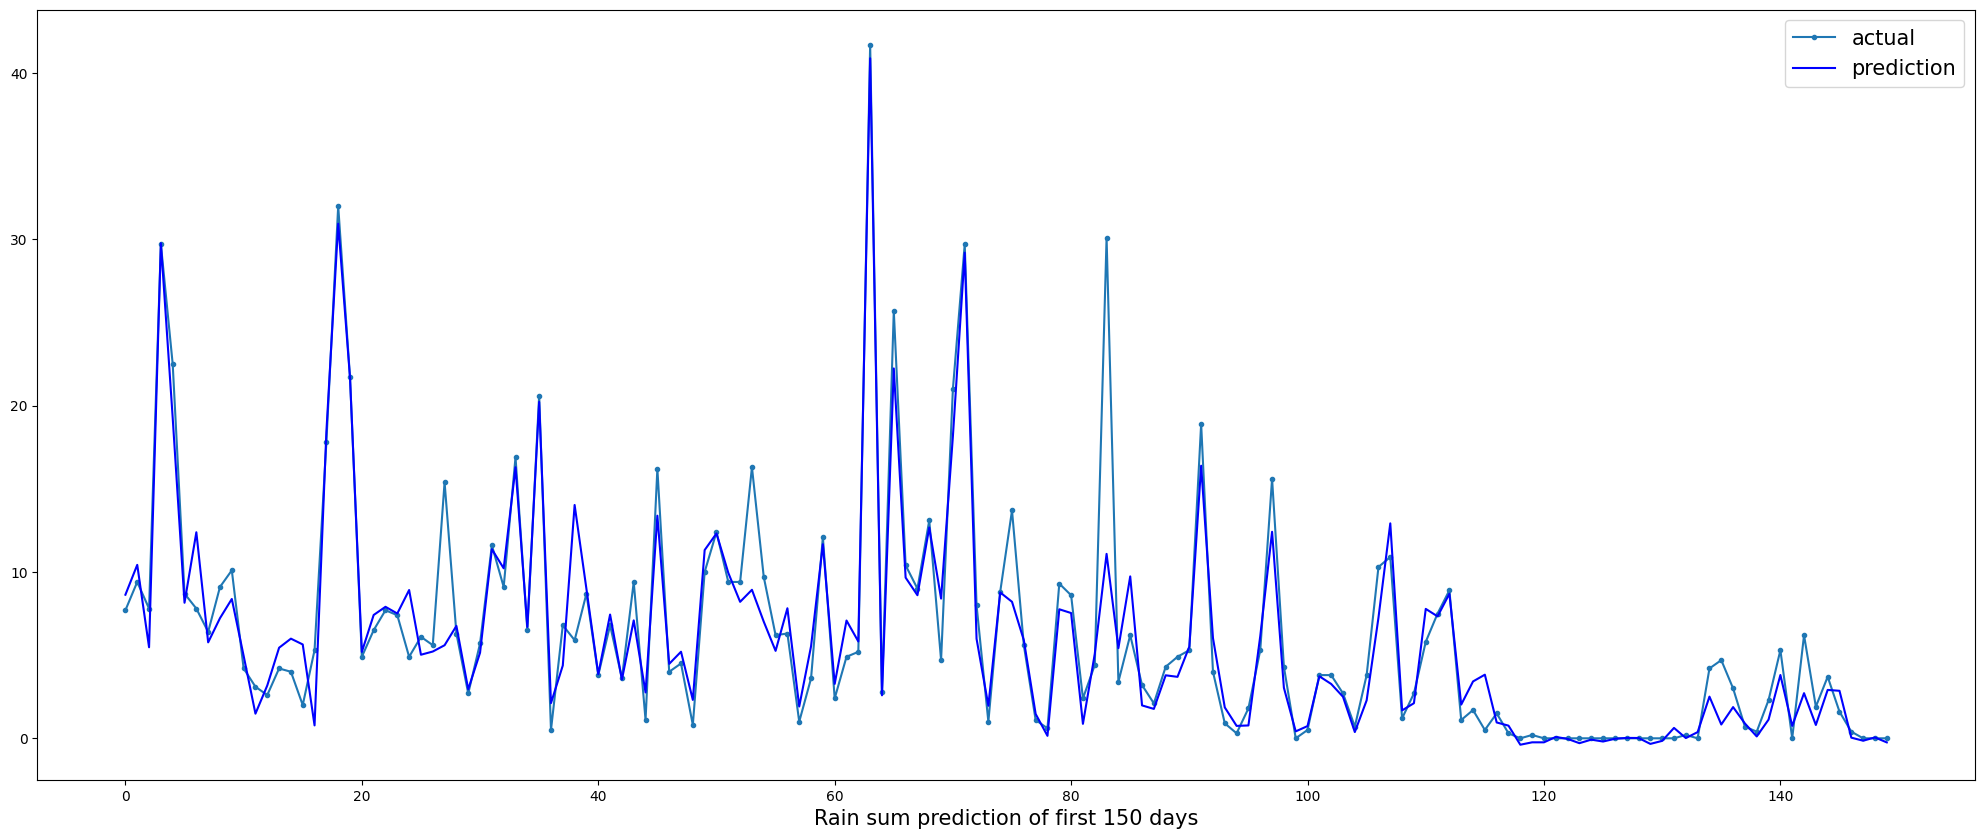

In [93]:
y_predicted, y_actual = Models(XGBRegressor())
Graph_prediction(150, y_actual, y_predicted)

In [94]:
X,y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)

model = XGBRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

MSE = metrics.mean_squared_error(y_test, y_pred)
ATrS =  model.score(X_train,y_train)
ATeS = model.score(X_test,y_test)

print(MSE)

21.22006568555519


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

In [ ]:
# function to get Permutation Importance

def getPermuImportance(model):
    model.fit(X_train, y_train)
    perm = PermutationImportance(model, random_state=42).fit(X_test, y_test)
    return eli5.show_weights(perm, feature_names = cleaned_train_all.drop(columns=['rain_sum (mm)']).columns.tolist())

In [ ]:
XGB = XGBRegressor()
display(getPermuImportance(XGB))

Weight,Feature
0.7475 ± 0.0589,avg_relativehumidity_2m (%)
0.3207 ± 0.0069,max_soil_moisture_0_to_7cm (m³/m³)
0.1725 ± 0.0232,min_soil_moisture_7_to_28cm (m³/m³)
0.1521 ± 0.0052,max_soil_moisture_7_to_28cm (m³/m³)
0.0655 ± 0.0534,max_shortwave_radiation (W/m²)
0.0645 ± 0.0080,min_soil_moisture_100_to_255cm (m³/m³)
0.0537 ± 0.0030,min_soil_moisture_0_to_7cm (m³/m³)
0.0396 ± 0.0073,min_soil_moisture_28_to_100cm (m³/m³)
0.0393 ± 0.0022,min_dewpoint_2m (°C)
0.0311 ± 0.0034,avg_cloudcover (%)


In [95]:
df_coba = cleaned_train_all[['rain_sum (mm)','avg_relativehumidity_2m (%)', 'max_soil_moisture_0_to_7cm (m³/m³)', 'min_soil_moisture_7_to_28cm (m³/m³)', 'max_soil_moisture_7_to_28cm (m³/m³)']]
df_coba

,rain_sum (mm),avg_relativehumidity_2m (%),max_soil_moisture_0_to_7cm (m³/m³),min_soil_moisture_7_to_28cm (m³/m³),max_soil_moisture_7_to_28cm (m³/m³)
0,7.7,87.000000,0.331,0.296,0.307
1,9.4,85.875000,0.362,0.305,0.317
2,7.8,84.000000,0.319,0.298,0.313
3,29.7,86.916667,0.403,0.300,0.364
4,22.5,85.458333,0.381,0.316,0.359
...,...,...,...,...,...
13247,2.8,72.125000,0.169,0.203,0.203
13248,2.1,77.666667,0.173,0.203,0.203
13249,0.0,79.458333,0.163,0.202,0.203
13250,0.0,79.208333,0.145,0.202,0.202


In [96]:
X = df_coba.drop(columns=['rain_sum (mm)']).values
y = df_coba['rain_sum (mm)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)

model = XGBRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

MSE = metrics.mean_squared_error(y_test, y_pred)
ATrS =  model.score(X_train,y_train)
ATeS = model.score(X_test,y_test)

print(MSE)

32.45476608738983


In [97]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, eval_metric=mean_squared_error)
model.fit(X_train, y_train, early_stopping_rounds=5, 
             eval_set=[(X_test, y_test)], verbose=False)

/opt/anaconda3/envs/ds/lib/python3.10/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x7faa196443a0>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.05, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [101]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

MSE = metrics.mean_squared_error(y_test, y_pred)
ATrS =  model.score(X_train,y_train)
ATeS = model.score(X_test,y_test)

print(MSE)

33.423028390705014


### Hyperopt XGB

In [ ]:
X = df_coba.drop(columns=['rain_sum (mm)'])
y = df_coba['rain_sum (mm)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)

In [ ]:
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK

In [ ]:
def objective(search_space):
    model = XGBRegressor(**search_space, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

# new search space
search_space={'max_depth': hp.randint('max_depth',3,30),
              'max_leaves': hp.randint('max_leaves', 3, 50),
}

algorithm = tpe.suggest

best_params = fmin(
    fn=objective,
    space=search_space,
    algo=algorithm,
    max_evals=150)

100%|██████████| 150/150 [02:37<00:00,  1.05s/trial, best loss: 29.198521824098044]


In [ ]:
space_eval(search_space, best_params)

{'max_depth': 3, 'max_leaves': 29}

In [102]:
model = XGBRegressor(max_depth=3, max_leaves=29, eval_metric=mean_squared_error)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

MSE = metrics.mean_squared_error(y_test, y_pred)
ATrS =  model.score(X_train,y_train)
ATeS = model.score(X_test,y_test)

print(MSE)

29.198521824098044


### Using Features Selection from Pearson Correlation Technique

In [ ]:
final_train = final_train.drop(['time','elevation'], axis=1)
final_train = pd.get_dummies(final_train, columns=['city'], drop_first=True)

In [ ]:
final_train

,rain_sum (mm),avg_cloudcover (%),min_relativehumidity_2m (%),city_le,city_lh,city_p,city_q,city_sa,city_si,city_su,city_t,city_u
0,7.7,73.041667,74.0,0,0,0,0,0,0,1,0,0
1,9.4,62.833333,75.0,0,0,0,0,0,0,1,0,0
2,7.8,64.041667,73.0,0,0,0,0,0,0,1,0,0
3,29.7,58.916667,73.0,0,0,0,0,0,0,1,0,0
4,22.5,52.208333,69.0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
13247,2.8,90.291667,64.0,0,0,0,1,0,0,0,0,0
13248,2.1,93.416667,74.0,0,0,0,1,0,0,0,0,0
13249,0.0,90.416667,77.0,0,0,0,1,0,0,0,0,0
13250,0.0,57.125000,61.0,0,0,0,1,0,0,0,0,0


# Submission

In [38]:
cleaned_test

,id,time,sunrise (iso8601),sunset (iso8601),winddirection_10m_dominant (°),et0_fao_evapotranspiration (mm),elevation,city,max_temperature_2m (°C),max_relativehumidity_2m (%),...,sum_et0_fao_evapotranspiration (mm),sum_vapor_pressure_deficit (kPa),sum_soil_temperature_0_to_7cm (°C),sum_soil_temperature_7_to_28cm (°C),sum_soil_temperature_28_to_100cm (°C),sum_soil_temperature_100_to_255cm (°C),sum_soil_moisture_0_to_7cm (m³/m³),sum_soil_moisture_7_to_28cm (m³/m³),sum_soil_moisture_28_to_100cm (m³/m³),sum_soil_moisture_100_to_255cm (m³/m³)
0,0,2021-08-02,2021-08-02T05:39,2021-08-02T17:30,134.0,4.45,0,su,32.5,85.0,...,4.45,34.16,754.7,735.0,701.6,686.4,1.356,1.860,2.700,5.616
1,1,2021-08-03,2021-08-03T05:39,2021-08-03T17:30,131.0,4.32,0,su,32.2,87.0,...,4.32,30.50,742.5,734.2,704.0,686.4,1.463,1.825,2.678,5.599
2,2,2021-08-04,2021-08-04T05:39,2021-08-04T17:30,116.0,4.73,0,su,32.5,89.0,...,4.73,29.64,744.8,733.4,706.0,688.5,1.429,1.789,2.662,5.592
3,3,2021-08-05,2021-08-05T05:39,2021-08-05T17:30,115.0,4.96,0,su,32.3,92.0,...,4.96,29.41,740.1,731.7,708.0,688.8,1.404,1.764,2.649,5.579
4,4,2021-08-06,2021-08-06T05:38,2021-08-06T17:30,106.0,4.99,0,su,32.2,92.0,...,4.99,28.23,735.7,729.6,708.4,688.8,1.386,1.738,2.627,5.568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4967,4967,2022-12-18,1970-01-01T07:00,1970-01-01T07:00,47.0,0.48,0,q,-10.1,64.0,...,0.48,2.38,-251.7,-246.6,-229.8,-193.4,6.336,4.920,5.688,6.048
4968,4968,2022-12-19,1970-01-01T07:00,1970-01-01T07:00,64.0,0.51,0,q,-4.5,67.0,...,0.51,3.21,-247.4,-244.4,-230.4,-194.4,6.336,4.920,5.688,6.048
4969,4969,2022-12-20,1970-01-01T07:00,1970-01-01T07:00,273.0,0.03,0,q,-5.8,81.0,...,0.03,1.30,-243.3,-240.6,-230.4,-195.7,6.336,4.920,5.688,6.048
4970,4970,2022-12-21,1970-01-01T07:00,1970-01-01T07:00,293.0,0.00,0,q,-17.3,81.0,...,0.00,0.70,-251.1,-244.4,-230.4,-196.8,6.336,4.920,5.688,6.048


In [ ]:
cleaned_test_all = pd.get_dummies(cleaned_test, columns=['city'], drop_first=True)

In [39]:
features = ['elevation', 'avg_cloudcover (%)', 'avg_relativehumidity_2m (%)']
X_test = cleaned_test[features]

In [40]:
X_test

,elevation,avg_cloudcover (%),avg_relativehumidity_2m (%)
0,0,13.625000,65.166667
1,0,20.500000,69.000000
2,0,16.666667,70.083333
3,0,21.750000,70.500000
4,0,28.708333,71.625000
...,...,...,...
4967,0,95.166667,54.875000
4968,0,100.000000,62.250000
4969,0,73.916667,75.583333
4970,0,79.458333,76.958333


In [41]:
y_test = pipe.predict(X_test)

In [42]:
submission = pd.DataFrame({
    'id' : cleaned_test.id,
    'rain_sum (mm)' : y_test
})
submission

,id,rain_sum (mm)
0,0,0.144
1,1,0.031
2,2,0.092
3,3,0.108
4,4,0.050
...,...,...
4967,4967,0.000
4968,4968,0.001
4969,4969,0.767
4970,4970,1.234


In [43]:
submission.to_csv('submission.csv', index=False)

Submission 2

In [103]:
def submission(features, model):
    X_test = cleaned_test[features]
    y_test = model.predict(X_test)
    
    submission = pd.DataFrame({
    'id' : cleaned_test.id,
    'rain_sum (mm)' : y_test
    })
    return submission

In [104]:
model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x7faa196443a0>,
             gamma=0, gpu_id=-1, grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=29,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, ...)

In [105]:
features = ['avg_relativehumidity_2m (%)', 'max_soil_moisture_0_to_7cm (m³/m³)', 'min_soil_moisture_7_to_28cm (m³/m³)', 'max_soil_moisture_7_to_28cm (m³/m³)']

submission = submission(features, model)
submission

,id,rain_sum (mm)
0,0,0.141429
1,1,0.141429
2,2,0.141429
3,3,0.141429
4,4,0.072570
...,...,...
4967,4967,3.449313
4968,4968,3.449313
4969,4969,4.766880
4970,4970,4.766880


In [106]:
submission.to_csv('submission.csv', index=False)